<a href="https://colab.research.google.com/github/kuroshimad/test/blob/main/wallpaper_symmetry_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this code, we will use a figure from the user and generate wallpaper patterns. (P1, P2, P4, Pm, Pg, P2mm, P2mg, P2gg, Cm, P3m)


##Here you need to load modules

In [6]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
import random
from matplotlib.transforms import Bbox
import os

## First you need to upload your image here.


This is the uploaded image.


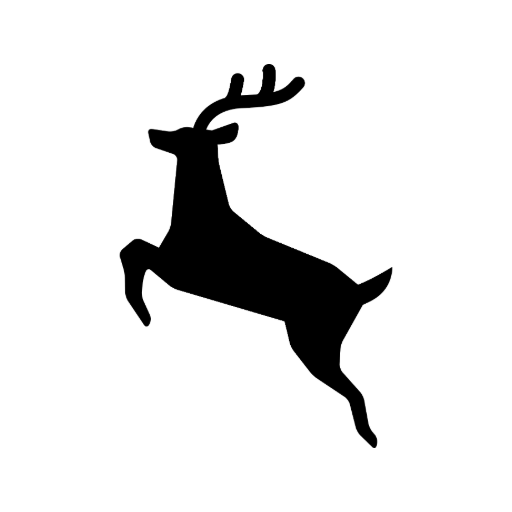

In [10]:
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = Image.open(img_path)
print("This is the uploaded image.")
img

## Here I define each wallpaper groups

In [11]:
def create_mirror_left_right(img):
    img = Image.open(img_path)
    return img.transpose(Image.FLIP_LEFT_RIGHT)
def create_mirror_top_bottom(img):
    img = Image.open(img_path)
    return img.transpose(Image.FLIP_TOP_BOTTOM)




def tile_image_p1(img_path, rows, cols):
    if (rows < 1 or cols < 1):
        print("You need at least 1x1 system size for Pg!!!")
        return 0;
    img = Image.open(img_path)
    img_array = np.asarray(img)

    tiled_array = np.tile(img_array, (rows, cols, 1))
    return tiled_array




def tile_image_p2(img_path, rows, cols):
    if (rows < 1 or cols < 2):
        print("You need at least 1x2 system size for P2!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    # Create an empty array to hold the final tiled image
    img_height, img_width, channels = img_array.shape
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)

    # Fill the array with the tiles, applying 180° rotations for alternating tiles
    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile (based on row and column parity)
            if (j) % 2 == 1:
                tile = np.rot90(img_array, 2)  # Rotate 180° using 2 90° rotations
            else:
                tile = img_array  # No rotation

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array

def tile_image_pm(img_path, rows, cols):
    if (rows < 1 or cols < 2):
        print("You need at least 1x2 system size for Pm!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    mirror_lr = create_mirror_left_right(img)



    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape

    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)


    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile based on row and column parity
            if (j) % 2 == 1:
                tile = mirror_lr  # # Flip vertically
            else:
                tile = img_array  # No rotation

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array



def tile_image_pg(img_path, rows, cols):
    if (rows < 1 or cols < 2):
        print("You need at least 1x2 system size for Pg!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    mirror_lr = create_mirror_left_right(img)
    mirror_tp =  create_mirror_top_bottom(img)


    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape

    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)


    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile (based on row and column parity)
            if (j) % 2 == 1:
                tile = mirror_tp  # # Flip both vertically and horizontally
            else:
                tile = img_array  # No rotation

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array



def tile_image_cm(img_path, rows, cols):
    if (rows < 2 or cols < 2):
        print("You need at least 2x2 system size for Cm!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)
    mirror_lr = create_mirror_left_right(img)



    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape

    #Get the blank part of the image
    blank_array = np.zeros((img_height,img_width,channels))

    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)


    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile (based on row and column parity)
            if j  % 4 == 0 and i % 2 ==0:
                tile = img_array
            elif j % 4 == 1 and i % 2 ==0:
                tile = mirror_lr
            elif j  % 4 == 2 and i % 2 ==1:
                tile = img_array
            elif j % 4 == 3 and i % 2 ==1:
                tile = mirror_lr
            else:
                tile = blank_array

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array



def tile_image_p2mm(img_path, rows, cols):
    if (rows < 2 or cols < 2):
        print("You need at least 2x2 system size for P2mm!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    mirror_lr = create_mirror_left_right(img)
    mirror_tp = create_mirror_top_bottom(img)
    mirror_lr_tb =  np.rot90(img,2)

    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape

    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)


    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile (based on row and column parity)
            if (i % 2 == 1 and j % 2 == 0):
                tile = mirror_tp  # Flip vertically
            elif (i % 2 == 0 and j % 2 == 1):
                tile = mirror_lr  # Flip horizontally
            elif (i % 2 == 1 and j % 2 == 1):
                tile = mirror_lr_tb  # Flip both sides
            else:
                tile = img_array  # No rotation

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array


def tile_image_p2mg(img_path, rows, cols):
    if (rows < 2 or cols < 2):
        print("You need at least 2x2 system size for PP2mg!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    mirror_lr = create_mirror_left_right(img)
    mirror_tb = create_mirror_top_bottom(img)
    mirror_lr_tb =  np.rot90(img,2)

    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape

    #Get the blank part of the image
    blank_array = np.zeros((img_height,img_width,channels))

    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)


    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile (based on row and column parity)
            if j  % 4 == 0 and i % 2 ==0:
                tile = img_array
            elif j % 4 == 1 and i % 2 ==0:
                tile = mirror_lr
            elif j  % 4 == 2 and i % 2 ==1:
                tile = mirror_tb
            elif j % 4 == 3 and i % 2 ==1:
                tile = mirror_lr_tb
            else:
                tile = blank_array

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array


def tile_image_p2gg(img_path, rows, cols):
    if (rows < 2 or cols < 2):
        print("You need at least 2x2 system size for P2gg!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    mirror_lr = create_mirror_left_right(img)
    mirror_tb = create_mirror_top_bottom(img)
    mirror_lr_tb =  np.rot90(img,2)

    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape

    #Get the blank part of the image
    blank_array = np.zeros((img_height,img_width,channels))

    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)


    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile (based on row and column parity)
            if j  % 4 == 0 and i % 2 ==0:
                tile = img_array
            elif j % 4 == 1 and i % 2 ==0:
                tile = mirror_lr_tb
            elif j  % 4 == 2 and i % 2 ==1:
                tile = mirror_tb
            elif j % 4 == 3 and i % 2 ==1:
                tile = mirror_lr
            else:
                tile = blank_array

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array


def tile_image_p4(img_path, rows, cols):
    if (rows < 2 or cols < 2):
        print("You need at least 2x2 system size for P4!!!")
        return 0;
    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    mirror_r1 = np.rot90(img,1)
    mirror_r2 = np.rot90(img,2)
    mirror_r3 = np.rot90(img,3)

    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape
    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((rows * img_height, cols * img_width, channels), dtype=img_array.dtype)


    for i in range(rows):
        for j in range(cols):
            # Rotate by 180° for every alternate tile (based on row and column parity)
            if (i % 2 == 1 and j % 2 == 0):
                tile = mirror_r1  # flip vertically
            elif (i % 2 == 1 and j % 2 == 1):
                tile = mirror_r2  # flip horizontally
            elif (i % 2 == 0 and j % 2 == 1):
                tile = mirror_r3  # flip both sides
            else:
                tile = img_array  # No rotation

            # Place the tile in the correct position in the final array
            start_y = i * img_height
            start_x = j * img_width
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array

def tile_image_p3m(img_path, rows, cols):
    if rows < 2 or cols < 2:
        print("You need at least 2x2 system size for P3m!")
        return 0

    # Load the image
    img = Image.open(img_path)
    img_array = np.asarray(img)

    # Rotate the image by 120° and 240°
    img120 = img.rotate(120)
    img240 = img.rotate(240)

    # Reflect images
    img_array_mirror = np.fliplr(img_array)  # Horizontal reflection (left-right)
    img120_mirror = np.fliplr(img120)
    img240_mirror = np.fliplr(img240)

    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape
    tiled_height = rows * img_height
    tiled_width = cols * img_width + (img_width // 2)  # Add extra width for staggered alignment
    print(tiled_height)
    print(tiled_width)

    # Create an empty array to hold the final tiled image
    tiled_array = np.zeros((tiled_height, tiled_width, channels), dtype=img_array.dtype)

    # Get the blank part of the image (empty tile)
    blank_array = np.zeros((img_height, img_width, channels))

    for i in range(rows):
        for j in range(cols):
            start_y = i * img_height
            start_x = j * img_width + (img_width // 2 if i % 2 == 1 else 0)

            # Apply both mirror and rotational symmetries
            if (i % 2 == 0):
                if (j % 2 == 0):
                    tile = img_array
                else:
                    tile = img120
            else:
                if (j % 2 == 0):
                    tile = img240
                else:
                    tile = img_array_mirror

            # Place the tile in the correct position in the final array
            tiled_array[start_y:start_y + img_height, start_x:start_x + img_width] = tile

    return tiled_array


##Here you can test with how the outcome look like

(np.float64(-0.5), np.float64(1535.5), np.float64(1535.5), np.float64(-0.5))

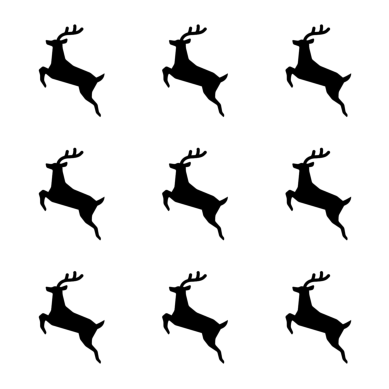

In [12]:
# Specify how many times to repeat the image along the x and y axes
cols, rows = 3, 3

#You can uncomment and test with your desired patterns.

#For P1
tiled_image = tile_image_p1(img_path, cols, rows)
#For P2
#tiled_image = tile_image_p2(img_path, cols, rows)
#For Pm
#tiled_image = tile_image_pm(img_path, cols, rows)
#For Pg
#tiled_image = tile_image_pg(img_path, cols, rows)
#For cm
#tiled_image = tile_image_cm(img_path, cols, rows)
#For P2mm
#tiled_image = tile_image_p2mm(img_path,cols, rows)
#For P2mg
#tiled_image = tile_image_p2mg(img_path, cols, rows)
#For P2gg
#tiled_image = tile_image_p2gg(img_path, cols, rows)
#For P4
#tiled_image = tile_image_p4(img_path, cols, rows)
#For P3m
#tiled_image = tile_image_p3m(img_path, cols, rows)


plt.imshow(tiled_image)
plt.axis('off')
#plt.show()

##Here I make some functions to zoom-in, change color, or rotate image.

In [ ]:
#MY ZOOM IN CODE
#Refered from
#https://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions

def zoom_image(img, zoom_factor, final_size, color,color_rand, color_lst,ROT,ROT_rand,rot):
    """Zoom an image and resize it to the final size without excessive blurring."""
    if (ROT):
        imgROT = rotate_img(img,ROT_rand,rot)
    else:
        imgROT = img
    img_array = np.asarray(imgROT)
    # Get the dimensions of the image
    img_height, img_width, channels = img_array.shape

    if zoom_factor < 1:
        raise ValueError("Zoom factor must be >= 1. Only zoom-in is supported.")

    # Calculate dimensions for cropping
    zh = int(np.round(img_height / zoom_factor))
    zw = int(np.round(img_width / zoom_factor))

    if zh > img_height or zw > img_width:
        raise ValueError("Zoom factor is too high, resulting in invalid crop dimensions.")

    # Determine random crop positions
    top = random.randint(0, img_height - zh)
    left = random.randint(0, img_width - zw)

    # Crop the image
    cropped_img = img_array[top:top + zh, left:left + zw]

    # Create a zoom tuple for resizing
    zoom_tuple = (final_size[1] / cropped_img.shape[0], final_size[0] / cropped_img.shape[1], 1)

    # Resize the cropped image to final size
    out = zoom(cropped_img, zoom_tuple, order=3)  # Bicubic interpolation for smoother results

    # Convert back to an image and return
    final_image = Image.fromarray(np.clip(out, 0, 255).astype(np.uint8))


    if (color):
      if (color_rand):
        final_image = color_change(final_image)
      else:
        final_image = set_color(final_image, color_lst)

    return final_image




def color_change(img):
    """Replace black pixels in the image with a random color."""
    # Generate a random RGB color
    random_color = tuple(random.randint(0, 255) for _ in range(3))
    #print(random_color)
    # Replace black pixels ([0, 0, 0]) with the random color
    img_array = np.asarray(img).copy()


    if img_array.shape[-1] != 4:
        raise ValueError("Image does not have 4 channels (RGBA).")

    # Identify solid black pixels (R=0, G=0, B=0, A>0)
    black_pixels = (((img_array[..., 0] == 0) & (img_array[..., 1] == 0) & (img_array[..., 2] == 0)) | (img_array[..., 3] > 0))

    # Replace the RGB channels of solid black pixels with the random color
    img_array[black_pixels, 0:3] = random_color

    return Image.fromarray(img_array)

def set_color(img,color_lst):
    """Replace black pixels in the image with a random color."""
    # Generate a random RGB color
    random_color = color_lst
    #print(random_color)
    # Replace black pixels ([0, 0, 0]) with the random color
    img_array = np.asarray(img).copy()


    if img_array.shape[-1] != 4:
        raise ValueError("Image does not have 4 channels (RGBA).")

    # Identify solid black pixels (R=0, G=0, B=0, A>0)
    black_pixels = (((img_array[..., 0] == 0) & (img_array[..., 1] == 0) & (img_array[..., 2] == 0)) | (img_array[..., 3] > 0))

    # Replace the RGB channels of solid black pixels with the random color
    img_array[black_pixels, 0:3] = random_color

    return Image.fromarray(img_array)



def rotate_img(img_array,ROT_rand,rot):
    img = Image.fromarray(img_array)
    #img_array = np.asarray(img)
    if (ROT_rand):
      rot_rnd = round(random.random()*360)
      return img.rotate(rot_rnd)
    else:
      return img.rotate(rot)







##Here you can create your images with desired way

In [ ]:
#Which patterns would you like to get? You can choose multiple patterns as well.
#Please choose from here. ["p1", "p2", "p4", "pm", "pg", "p2mm", "p2mg", "p2gg"]
sym_lst = ["p1", "p2"]
#Do you want to have random zoom-in for the images? If it is applied, it will be zoom from zoom_ratio to zoom_ratio+1.
ZOOM = True;
#Enter the zoom ratio you want. If you wish not to zoom, write 1.
zoom_ratio = 1
#Do you want to change color of images? Write True if you want, write False otherwise.
COLOR = True;
#Do you want to have random color of images? Write True if you want, If you just want to change the color, write False. Default color is purple.
COLOR_rand = True;
#If you set COLOR_rand as False, set the color here. Write the color in RGB. If you want to change the color for each polymorph, you can do as following.
#If you want it to be the same color, just write one as commented out below.
color_lst = [[86, 1, 141],[86, 1, 141]]
#color_lst = [[86, 1, 141]]

#Do you want to change rotation of images? Write True if you want, write False otherwise.
ROT = True;
#Do you want to have random rotation of images? Write True if you want, If you want to set the rotation, write false.
ROT_rand = True;
#If you set ROT_rand as False, set the rotation here. Write the rotation in degree. If you want to change the rotation for each polymorph, you can do as following.
#If you want it to be the same rotation, just write one as commented out below.
rot_lst = [180,180]
#rot_lst = [90]

#Name of output directory. Default is "train"
out_dir = "train/"

#How do you want to name the file? If you want to name individually, you can do as following.
#If you want it to be the same name, just write one as commented out below.
user_name_lst = ["nozoom_rand","nozoom_rand"]
#user_name_lst = ["nozoom_rand"]

#How many images do you want to get?
N_img = 1

#You can change a random see here. If you make testing set for example, make sure you change the following number.
random.seed(123)

#Specify how many times do you want to replicate the original image.
rep = 8

#Specify the size of the final image. Default is (512x512)
final_size = (512,512)




tile_functions = {
    "p1": tile_image_p1,
    "p2": tile_image_p2,
    "pm": tile_image_pm,
    "p4": tile_image_pm,
    "pg": tile_image_pg,
    "p2mm": tile_image_p2mm,
    "p2mg": tile_image_p2mg,
    "p2gg": tile_image_p2gg,
    "cm": tile_image_cm,
    "p3m": tile_image_p3m
}

make_tile = [tile_functions[i] for i in sym_lst]

if (len(user_name_lst)!=len(sym_lst)):
  first_user_name = user_name_lst[0]
  user_name_lst = []
  for i in range(0, len(sym_lst)):
    user_name_lst.append(first_user_name)
if (len(color_lst)!=len(sym_lst)):
  first_color = color_lst[0]
  color_lst = []
  for i in range(0, len(sym_lst)):
    color_lst.append(first_color)
if (len(rot_lst)!=len(sym_lst)):
  first_rot = rot_lst[0]
  rot_lst = []
  for i in range(0, len(sym_lst)):
    rot_lst.append(first_rot)



for j in range(0,len(sym_lst)):
    sym_name = sym_lst[j];
    output_dir = out_dir + sym_name
    os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist
    tiled_image = make_tile[j](img_path, rep, rep)  # Adjust rows, cols for desired repetitions
    which_color = color_lst[j]
    user_name = user_name_lst[j]
    rot = rot_lst[j]


    for i in range(0,N_img):
        rot = rot_lst[i%4]


        f_name =  user_name + f"_img_{sym_name}-{i:03d}.png"  # Create the filename separately
        out_checker = os.path.join(output_dir, f_name)
        if(ZOOM):rnd1 = round(random.random()+zoom_ratio, 1);
        else:rnd1 =zoom_ratio;
        zoomed_img = zoom_image(tiled_image, rnd1, final_size, COLOR, COLOR_rand, which_color, ROT,ROT_rand,rot)
        img_scale = 0.755
        plt.rcParams["figure.figsize"] = [1/img_scale,1/img_scale]    # figure size in inches
        plt.rcParams["savefig.pad_inches"] = 0.0
        plt.rcParams['figure.dpi'] = 512    # resolution to match settings
        plt.axis("off")
        plt.imshow(zoomed_img)
        plt.savefig(out_checker,format='png',bbox_inches='tight', pad_inches=0)
        plt.clf()

<Figure size 678.146x678.146 with 0 Axes>